In [1]:
# predict flight ticket price

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
train=pd.read_excel('Data_Train.xlsx')
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.shape

(10683, 11)

In [259]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [3]:
test=pd.read_excel('Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
test.shape

(2671, 10)

In [8]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [9]:
sample=pd.read_excel('Sample_submission.xlsx')
sample.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [10]:
sample.shape

(2671, 1)

In [11]:
# one missing value in and one in Total_stops

In [12]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'], dtype='object')

In [13]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [14]:
# change dtype of:
# date_of_journey, dep_time, arrival_time, duration

In [16]:
# add new features owing to date_of_journey
# add new features owing to dep_time

In [42]:
# drop arrival time
# convert duration into minutes

In [4]:
train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey'])

In [5]:
test['Date_of_Journey']=pd.to_datetime(test['Date_of_Journey'])

In [6]:
train['year']=train['Date_of_Journey'].dt.year
train['month']=train['Date_of_Journey'].dt.month
train['day']=train['Date_of_Journey'].dt.day
train['dayofweek']=train['Date_of_Journey'].dt.dayofweek

In [22]:
# train[['Date_of_Journey','year','month','day','dayofweek']].head(20)

In [7]:
test['year']=test['Date_of_Journey'].dt.year
test['month']=test['Date_of_Journey'].dt.month
test['day']=test['Date_of_Journey'].dt.day
test['dayofweek']=test['Date_of_Journey'].dt.dayofweek

In [24]:
# lets make a feature weekday

In [8]:
train['weekday']=0
for i in range(len(train)):
    if train['dayofweek'].iloc[i]==5 or train['dayofweek'].iloc[i]==6:
        train['weekday'].iloc[i]=1

In [27]:
# train[['Date_of_Journey','year','month','day','dayofweek','weekday']].head(20)

In [9]:
test['weekday']=0
for i in range(len(test)):
    if test['dayofweek'].iloc[i]==5 or test['dayofweek'].iloc[i]==6:
        test['weekday'].iloc[i]=1

In [30]:
# test[['Date_of_Journey','year','month','day','dayofweek','weekday']].head(20)

In [10]:
train['Dep_Time']=pd.to_datetime(train['Dep_Time'])

In [11]:
train['hour']=train['Dep_Time'].dt.hour

In [35]:
# train[['Dep_Time','hour']].head(20)

In [12]:
test['Dep_Time']=pd.to_datetime(test['Dep_Time'])
test['hour']=test['Dep_Time'].dt.hour

In [38]:
# test[['Dep_Time','hour']].head(20)

In [39]:
# now drop Dep_Time,Date_of_Journey

In [13]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
1h 25m     135
2h 15m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
11h 45m     62
5h 15m      62
11h         62
1h 20m      61
14h 25m     61
6h 35m      60
10h 30m     57
12h 10m     57
22h 55m     57
12h 45m     56
5h 45m      54
16h 5m      53
7h 20m      52
12h 30m     52
11h 30m     52
15h 10m     51
4h 55m      51
8h 25m      50
10h 15m     50
10h         49
12h         49
10h 25m     49
12h 15m     48
6h 15m      47
5h 20m      45
11h 5m      45
26h 55m     44
8h 55m      42
14h 5m      42
9h 15m      42
13h         42
20h 10m     41
9h 35m      41
9h 20m      41
17h 5m      40
23h 40m     40
3h 10m      40
21h 15m     39
26h 35m     39
5h 5m     

In [14]:
train['duration_hr']=train['Duration'].str.split(' ').str[0]

In [15]:
train['duration_hr']=train['duration_hr'].str.replace('h','')

In [16]:
train['duration_hr']=train['duration_hr'].str.replace('5m','0')

In [17]:
train['duration_hr']=train['duration_hr'].astype(np.int64)

In [18]:
train['duration_hr']=train['duration_hr']*60

In [19]:
len(train['duration_hr'])

10683

In [20]:
test['duration_hr']=test['Duration'].str.split(' ').str[0]
# train['duration_hr']=train['duration_hr'].str.replace('h','')
# train['duration_hr']=train['duration_hr'].str.replace('5m','0')
# train['duration_hr']=train['duration_hr'].astype(np.int64)
# train['duration_hr']=train['duration_hr']*60

In [21]:
test['duration_hr'].value_counts()

2h     565
1h     164
5h     127
3h     126
7h     113
12h    110
13h    109
8h     107
9h     106
10h    104
6h     102
11h    102
14h     87
15h     71
23h     66
4h      56
22h     55
16h     52
26h     51
25h     45
24h     43
27h     43
21h     41
20h     41
18h     38
19h     34
17h     32
28h     22
30h     12
29h     11
33h      8
38h      7
37h      5
36h      4
32h      3
35h      3
31h      2
39h      1
5m       1
40h      1
34h      1
Name: duration_hr, dtype: int64

In [22]:
test['duration_hr']=test['duration_hr'].str.replace('h','')
test['duration_hr']=test['duration_hr'].str.replace('5m','0')
test['duration_hr']=test['duration_hr'].astype(np.int64)
test['duration_hr']=test['duration_hr']*60
len(test['duration_hr'])

2671

In [107]:
# now lets drop some columns

In [108]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'year', 'month', 'day', 'dayofweek', 'weekday', 'hour', 'duration_hr'], dtype='object')

In [23]:
# drop Arrival_Time,Duration,Date_of_Journey,Dep_Time
train.drop(['Arrival_Time','Duration','Date_of_Journey','Dep_Time'],axis=1,inplace=True)

In [24]:
test.drop(['Arrival_Time','Duration','Date_of_Journey','Dep_Time'],axis=1,inplace=True)

In [25]:
train.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,dayofweek,weekday,hour,duration_hr
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2019,3,24,6,1,22,120
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,2019,1,5,5,1,5,420
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,2019,9,6,4,0,9,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,2019,12,5,3,0,18,300
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,2019,1,3,3,0,16,240
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,2019,6,24,0,0,9,120
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,2019,12,3,1,0,18,900
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,2019,1,3,3,0,8,1260
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,2019,12,3,1,0,8,1500
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,2019,5,27,0,0,11,420


In [26]:
test.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,year,month,day,dayofweek,weekday,hour,duration_hr
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,6,6,3,0,17,600
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,2019,12,5,3,0,6,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,2019,5,21,1,0,19,1380
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,2019,5,21,1,0,8,780
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,2019,6,24,0,0,23,120
5,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,2019,12,6,4,0,18,1080
6,Air India,Banglore,New Delhi,BLR → TRV → DEL,1 stop,No info,2019,12,3,1,0,7,900
7,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,1 stop,No info,2019,1,5,5,1,15,300
8,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,2019,3,15,4,0,10,120
9,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1 stop,No info,2019,5,18,5,1,16,360


# EDA

# Univariate Analysis

In [116]:
# categorical: Airline,Source,Destination,Route,Total_Stops,Additional_Info
#             'year', 'month', 'day', 'dayofweek', 'weekday', 'hour',
    
# continuous: 'Price',  'duration_hr'

In [117]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [118]:
# binning required

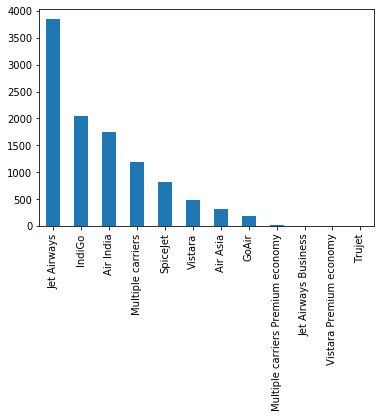

In [119]:
train['Airline'].value_counts().plot.bar()

In [120]:
train['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

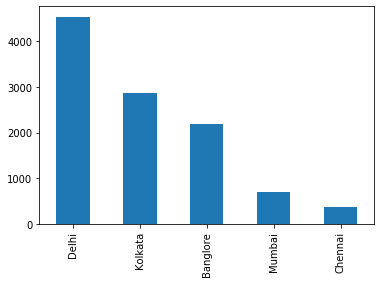

In [121]:
train['Source'].value_counts().plot.bar()

In [122]:
train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

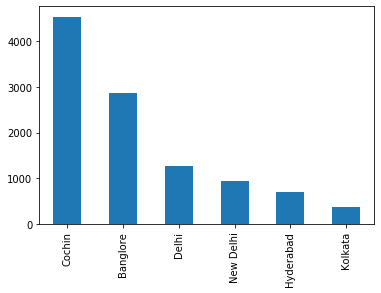

In [123]:
train['Destination'].value_counts().plot.bar()

In [124]:
train['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  50
CCU → IXR → DEL → BLR             

In [125]:
train['Route'].nunique()

128

In [126]:
# there are a lot of values
# maybe drop Route

In [127]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [128]:
# binning is required

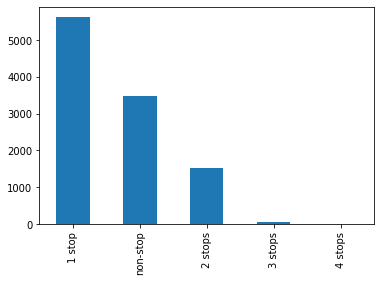

In [129]:
train['Total_Stops'].value_counts().plot.bar()

In [130]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [132]:
# binning is required

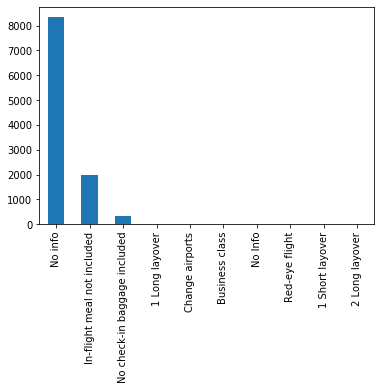

In [131]:
train['Additional_Info'].value_counts().plot.bar()

In [133]:
train['year'].value_counts()

2019    10683
Name: year, dtype: int64

In [134]:
# drop year

In [135]:
# train['year'].value_counts().plot.bar()

In [136]:
train['month'].value_counts()

6     2536
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: month, dtype: int64

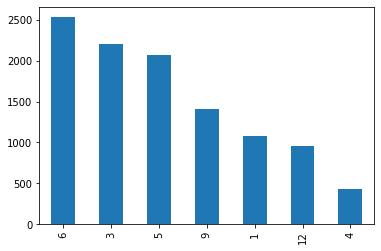

In [137]:
train['month'].value_counts().plot.bar()

In [138]:
train['day'].value_counts()

6     2166
5     1392
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: day, dtype: int64

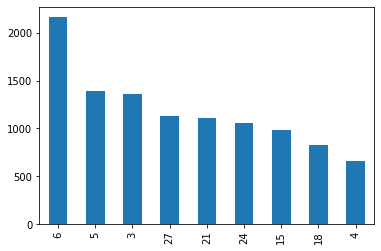

In [139]:
train['day'].value_counts().plot.bar()

In [140]:
train['dayofweek'].value_counts()

3    2290
4    1802
2    1599
0    1491
1    1236
5    1203
6    1062
Name: dayofweek, dtype: int64

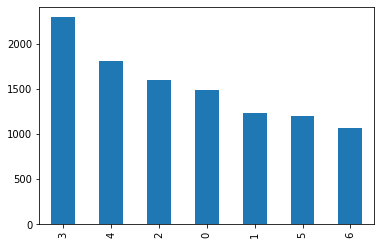

In [141]:
train['dayofweek'].value_counts().plot.bar()

In [142]:
train['weekday'].value_counts()

0    8418
1    2265
Name: weekday, dtype: int64

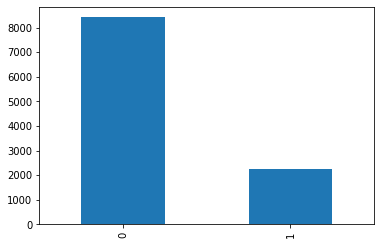

In [143]:
train['weekday'].value_counts().plot.bar()

In [144]:
train['hour'].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: hour, dtype: int64

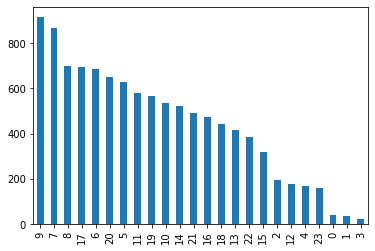

In [145]:
train['hour'].value_counts().plot.bar()

In [146]:
train.describe()[['Price','duration_hr']]

,Price,duration_hr
count,10683.000000,10683.000000
mean,9087.064121,614.765515
std,4611.359167,509.724870
min,1759.000000,0.000000
25%,5277.000000,120.000000
50%,8372.000000,480.000000
75%,12373.000000,900.000000
max,79512.000000,2820.000000


# Bivariate

In [147]:
# categorical: Airline,Source,Destination,Route,Total_Stops,Additional_Info
#             'year', 'month', 'day', 'dayofweek', 'weekday', 'hour',
    
# continuous: 'Price',  'duration_hr'

In [148]:
train.groupby('Airline').mean()[['Price']]

,Price
Airline,
Air Asia,5590.260188
Air India,9611.210616
GoAir,5861.056701
IndiGo,5673.682903
Jet Airways,11643.923357
Jet Airways Business,58358.666667
Multiple carriers,10902.678094
Multiple carriers Premium economy,11418.846154
SpiceJet,4338.284841


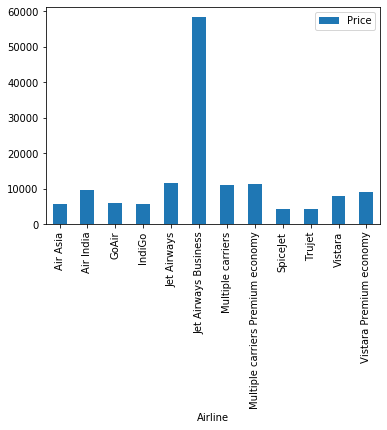

In [149]:
train.groupby('Airline').mean()[['Price']].plot.bar()

In [150]:
train.groupby('Source').mean()[['Price']]

,Price
Source,
Banglore,8017.464269
Chennai,4789.892388
Delhi,10539.439057
Kolkata,9158.389411
Mumbai,5059.708752


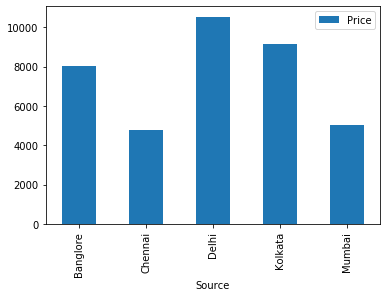

In [151]:
train.groupby('Source').mean()[['Price']].plot.bar()

In [152]:
train.groupby('Total_Stops').mean()[['Price']]

,Price
Total_Stops,
1 stop,10594.123556
2 stops,12715.807895
3 stops,13112.000000
4 stops,17686.000000
non-stop,5024.900315


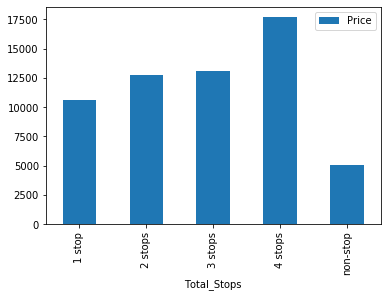

In [153]:
train.groupby('Total_Stops').mean()[['Price']].plot.bar()

In [154]:
train.groupby('Additional_Info').mean()[['Price']]

,Price
Additional_Info,
1 Long layover,22109.631579
1 Short layover,26743.000000
2 Long layover,26480.000000
Business class,56811.250000
Change airports,16800.714286
In-flight meal not included,9471.834511
No Info,8044.666667
No check-in baggage included,3645.156250
No info,9141.320192


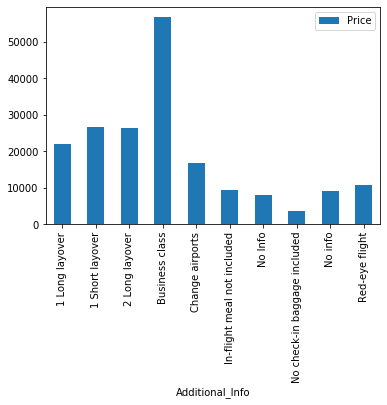

In [155]:
train.groupby('Additional_Info').mean()[['Price']].plot.bar()

In [156]:
train.groupby('month').mean()[['Price']]

,Price
month,
1,10492.642791
3,8433.839891
4,5230.860849
5,9361.077628
6,9214.964905
9,9551.474395
12,9110.774295


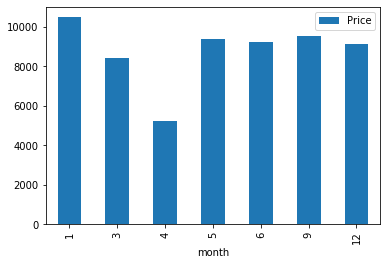

In [157]:
train.groupby('month').mean()[['Price']].plot.bar()

In [158]:
train.groupby('day').mean()[['Price']]

,Price
day,
3,13294.191036
4,6120.395420
5,8778.854167
6,9305.855956
15,8127.810976
18,8671.573317
21,8351.760576
24,8399.446768
27,8204.128319


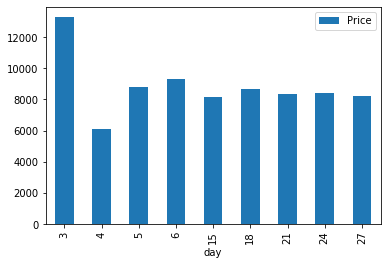

In [159]:
train.groupby('day').mean()[['Price']].plot.bar()

In [160]:
train.groupby('dayofweek').mean()[['Price']]

,Price
dayofweek,
0,9721.101945
1,8960.452265
2,7996.290807
3,9805.088646
4,8556.502220
5,8894.375727
6,9556.827684


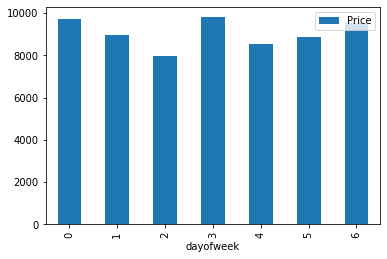

In [161]:
train.groupby('dayofweek').mean()[['Price']].plot.bar()

In [162]:
train.groupby('hour').mean()[['Price']]

,Price
hour,
0,7615.075000
1,4354.621622
2,8419.974227
3,10474.625000
4,7251.876471
5,9681.992051
6,8314.480349
7,8496.111880
8,10083.322812


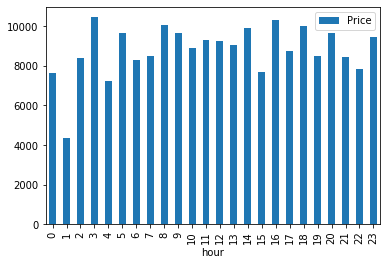

In [163]:
train.groupby('hour').mean()[['Price']].plot.bar()

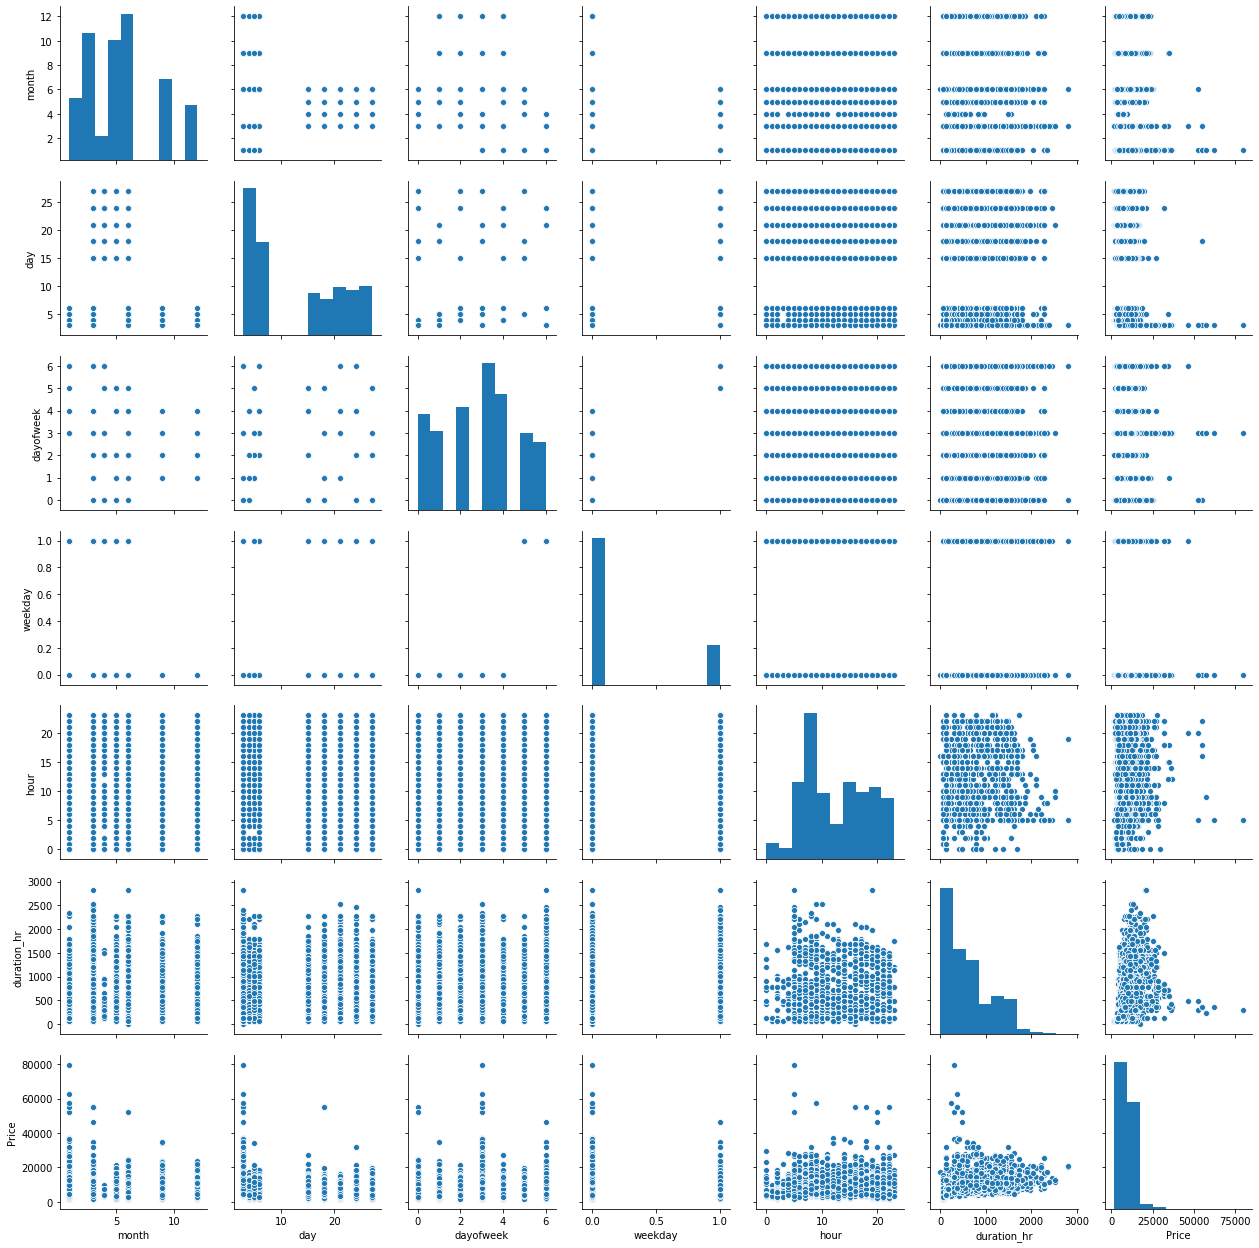

In [164]:
sns.pairplot(data=train,vars=['month', 'day', 'dayofweek', 'weekday', 'hour','duration_hr','Price'])

In [165]:
# now, before making distplot, boxplot and corr, 
# lets do 1-stage binning and 2-stage binning
# then encode the features

# 1 stage binning

In [166]:
# Airline,Total_Stops,Additional_Info

In [27]:
trainb=train.copy()

In [28]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [29]:
for i in range(len(trainb)):
    if trainb['Airline'].iloc[i]=='Air Asia' or trainb['Airline'].iloc[i]=='GoAir' or trainb['Airline'].iloc[i]=='Trujet':
        trainb['Airline'].iloc[i]='IndiGo'
    elif trainb['Airline'].iloc[i]=='Vistara Premium economy':
        trainb['Airline'].iloc[i]='Vistara'
    elif trainb['Airline'].iloc[i]=='Multiple carriers Premium economy':
        trainb['Airline'].iloc[i]='Multiple carriers'
    elif trainb['Airline'].iloc[i]=='Jet Airways Business':
        trainb['Airline'].iloc[i]='Jet Airways'

In [30]:
trainb['Airline'].value_counts()

Jet Airways          3855
IndiGo               2567
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Name: Airline, dtype: int64

In [31]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
for i in range(len(trainb)):
    if trainb['Total_Stops'].iloc[i]=='2 stops' or trainb['Total_Stops'].iloc[i]=='3 stops' or trainb['Total_Stops'].iloc[i]=='4 stops':
        trainb['Total_Stops'].iloc[i]='2 Plus'

In [33]:
trainb['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 Plus      1566
Name: Total_Stops, dtype: int64

In [34]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [35]:
for i in range(len(trainb)):
    if trainb['Additional_Info'].iloc[i]=='1 Long layover' or trainb['Additional_Info'].iloc[i]=='Change airports' or trainb['Additional_Info'].iloc[i]=='Business class' or trainb['Additional_Info'].iloc[i]=='Red-eye flight' or trainb['Additional_Info'].iloc[i]=='1 Short layover' or trainb['Additional_Info'].iloc[i]=='2 Long layover':
        trainb['Additional_Info'].iloc[i]='Others'
    elif trainb['Additional_Info'].iloc[i]=='No Info':
        trainb['Additional_Info'].iloc[i]='No info'

In [36]:
trainb['Additional_Info'].value_counts()

No info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Others                            33
Name: Additional_Info, dtype: int64

In [37]:
testb=test.copy()

In [38]:
for i in range(len(testb)):
    if testb['Airline'].iloc[i]=='Air Asia' or testb['Airline'].iloc[i]=='GoAir' or testb['Airline'].iloc[i]=='Trujet':
        testb['Airline'].iloc[i]='IndiGo'
    elif testb['Airline'].iloc[i]=='Vistara Premium economy':
        testb['Airline'].iloc[i]='Vistara'
    elif testb['Airline'].iloc[i]=='Multiple carriers Premium economy':
        testb['Airline'].iloc[i]='Multiple carriers'
    elif testb['Airline'].iloc[i]=='Jet Airways Business':
        testb['Airline'].iloc[i]='Jet Airways'

In [39]:
for i in range(len(testb)):
    if testb['Total_Stops'].iloc[i]=='2 stops' or testb['Total_Stops'].iloc[i]=='3 stops' or testb['Total_Stops'].iloc[i]=='4 stops':
        testb['Total_Stops'].iloc[i]='2 Plus'

In [40]:
for i in range(len(testb)):
    if testb['Additional_Info'].iloc[i]=='1 Long layover' or testb['Additional_Info'].iloc[i]=='Change airports' or testb['Additional_Info'].iloc[i]=='Business class' or testb['Additional_Info'].iloc[i]=='Red-eye flight' or testb['Additional_Info'].iloc[i]=='1 Short layover' or testb['Additional_Info'].iloc[i]=='2 Long layover':
        testb['Additional_Info'].iloc[i]='Others'
    elif testb['Additional_Info'].iloc[i]=='No Info':
        testb['Additional_Info'].iloc[i]='No info'

# 2nd Stage binning

In [41]:
trainb2=trainb.copy()

In [42]:
for i in range(len(trainb2)):
    if trainb2['Additional_Info'].iloc[i]=='Others' or trainb2['Additional_Info'].iloc[i]=='In-flight meal not included':
        trainb2['Additional_Info'].iloc[i]='Others2'

In [43]:
trainb2['Additional_Info'].value_counts()

No info                         8348
Others2                         2015
No check-in baggage included     320
Name: Additional_Info, dtype: int64

In [44]:
testb2=testb.copy()

In [45]:
for i in range(len(testb2)):
    if testb2['Additional_Info'].iloc[i]=='Others' or testb2['Additional_Info'].iloc[i]=='In-flight meal not included':
        testb2['Additional_Info'].iloc[i]='Others2'

# Encoding

In [46]:
# now we'll encode all the categorical features in all the train and test datasets

In [47]:
from sklearn.preprocessing import LabelEncoder
def le(df,col):
    lab=LabelEncoder()
    df[col]=pd.Series(lab.fit_transform(df[col]))

In [48]:
train.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
year                int64
month               int64
day                 int64
dayofweek           int64
weekday             int64
hour                int64
duration_hr         int64
dtype: object

In [49]:
le(train,'Airline')
le(train,'Source')
le(train,'Destination')
# le(train,'Route')
# le(train,'Total_Stops')
le(train,'Additional_Info')

In [50]:
# manually encode Total_Stops

In [51]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [52]:
for i in range(len(train)):
    if train['Total_Stops'].iloc[i]=='1 stop':
        train['Total_Stops'].iloc[i]=1
    elif train['Total_Stops'].iloc[i]=='2 stops':
        train['Total_Stops'].iloc[i]=2
    elif train['Total_Stops'].iloc[i]=='3 stops':
        train['Total_Stops'].iloc[i]=3
    elif train['Total_Stops'].iloc[i]=='4 stops':
        train['Total_Stops'].iloc[i]=4
    elif train['Total_Stops'].iloc[i]=='non-stop':
        train['Total_Stops'].iloc[i]=0

In [53]:
train['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [54]:
le(test,'Airline')
le(test,'Source')
le(test,'Destination')
# le(train,'Route')
# le(train,'Total_Stops')
le(test,'Additional_Info')

In [55]:
for i in range(len(test)):
    if test['Total_Stops'].iloc[i]=='1 stop':
        test['Total_Stops'].iloc[i]=1
    elif test['Total_Stops'].iloc[i]=='2 stops':
        test['Total_Stops'].iloc[i]=2
    elif test['Total_Stops'].iloc[i]=='3 stops':
        test['Total_Stops'].iloc[i]=3
    elif test['Total_Stops'].iloc[i]=='4 stops':
        test['Total_Stops'].iloc[i]=4
    elif test['Total_Stops'].iloc[i]=='non-stop':
        test['Total_Stops'].iloc[i]=0

In [56]:
le(trainb,'Airline')
le(trainb,'Source')
le(trainb,'Destination')
# le(train,'Route')
# le(trainb,'Total_Stops')
le(trainb,'Additional_Info')

In [57]:
trainb['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 Plus      1566
Name: Total_Stops, dtype: int64

In [58]:
for i in range(len(trainb)):
    if trainb['Total_Stops'].iloc[i]=='1 stop':
        trainb['Total_Stops'].iloc[i]=1
    elif trainb['Total_Stops'].iloc[i]=='2 Plus':
        trainb['Total_Stops'].iloc[i]=2
    elif trainb['Total_Stops'].iloc[i]=='non-stop':
        trainb['Total_Stops'].iloc[i]=0

In [59]:
trainb['Total_Stops'].value_counts()

1    5625
0    3491
2    1566
Name: Total_Stops, dtype: int64

In [60]:
le(testb,'Airline')
le(testb,'Source')
le(testb,'Destination')
# le(testb,'Route')
# le(testb,'Total_Stops')
le(testb,'Additional_Info')

In [61]:
for i in range(len(testb)):
    if testb['Total_Stops'].iloc[i]=='1 stop':
        testb['Total_Stops'].iloc[i]=1
    elif testb['Total_Stops'].iloc[i]=='2 Plus':
        testb['Total_Stops'].iloc[i]=2
    elif testb['Total_Stops'].iloc[i]=='non-stop':
        testb['Total_Stops'].iloc[i]=0

In [62]:
le(trainb2,'Airline')
le(trainb2,'Source')
le(trainb2,'Destination')
# le(train,'Route')
# le(trainb2,'Total_Stops')
le(trainb2,'Additional_Info')

In [63]:
for i in range(len(trainb2)):
    if trainb2['Total_Stops'].iloc[i]=='1 stop':
        trainb2['Total_Stops'].iloc[i]=1
    elif trainb2['Total_Stops'].iloc[i]=='2 Plus':
        trainb2['Total_Stops'].iloc[i]=2
    elif trainb2['Total_Stops'].iloc[i]=='non-stop':
        trainb2['Total_Stops'].iloc[i]=0

In [64]:
le(testb2,'Airline')
le(testb2,'Source')
le(testb2,'Destination')
# le(testb,'Route')
# le(testb,'Total_Stops')
le(testb2,'Additional_Info')

In [65]:
for i in range(len(testb2)):
    if testb2['Total_Stops'].iloc[i]=='1 stop':
        testb2['Total_Stops'].iloc[i]=1
    elif testb2['Total_Stops'].iloc[i]=='2 Plus':
        testb2['Total_Stops'].iloc[i]=2
    elif testb2['Total_Stops'].iloc[i]=='non-stop':
        testb2['Total_Stops'].iloc[i]=0

# Comparison of two datasets

In [66]:
train.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,dayofweek,weekday,hour,duration_hr
0,3,0,5,BLR → DEL,0,8,3897,2019,3,24,6,1,22,120


In [67]:
test.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,year,month,day,dayofweek,weekday,hour,duration_hr
0,4,2,1,DEL → BOM → COK,1,5,2019,6,6,3,0,17,600


In [68]:
trainb.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,year,month,day,dayofweek,weekday,hour,duration_hr
0,1,0,5,BLR → DEL,0,2,3897,2019,3,24,6,1,22,120


In [69]:
testb.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,year,month,day,dayofweek,weekday,hour,duration_hr
0,2,2,1,DEL → BOM → COK,1,2,2019,6,6,3,0,17,600


# Distribution and Corr

# Train

In [70]:
# first drop Route from all
train.drop('Route',axis=1,inplace=True)
trainb.drop('Route',axis=1,inplace=True)
trainb2.drop('Route',axis=1,inplace=True)
test.drop('Route',axis=1,inplace=True)
testb.drop('Route',axis=1,inplace=True)
testb2.drop('Route',axis=1,inplace=True)

In [71]:
# drop the null values
train.dropna(inplace=True)
test.dropna(inplace=True)
trainb.dropna(inplace=True)
testb.dropna(inplace=True)
trainb2.dropna(inplace=True)
testb2.dropna(inplace=True)

In [72]:
# change dtype of Total_Stops
train['Total_Stops']=train['Total_Stops'].astype(np.int64)
trainb['Total_Stops']=trainb['Total_Stops'].astype(np.int64)
trainb2['Total_Stops']=trainb2['Total_Stops'].astype(np.int64)
test['Total_Stops']=test['Total_Stops'].astype(np.int64)
testb['Total_Stops']=testb['Total_Stops'].astype(np.int64)
testb2['Total_Stops']=testb2['Total_Stops'].astype(np.int64)

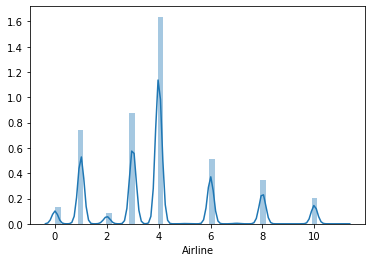

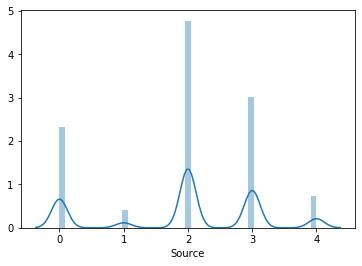

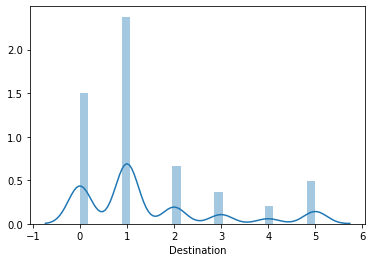

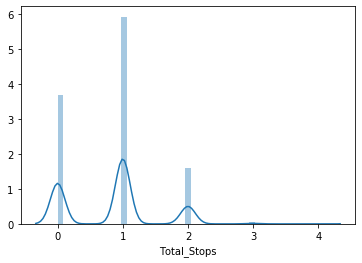

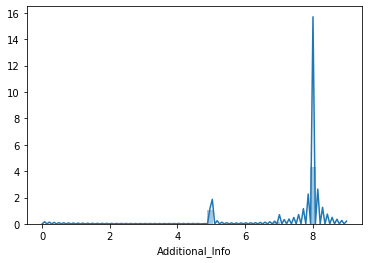

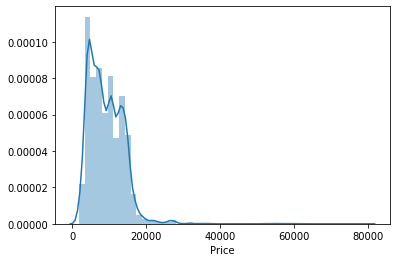

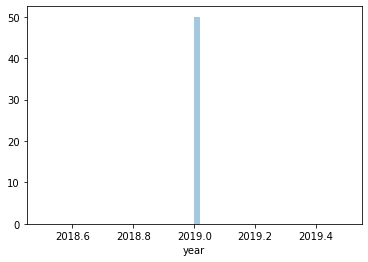

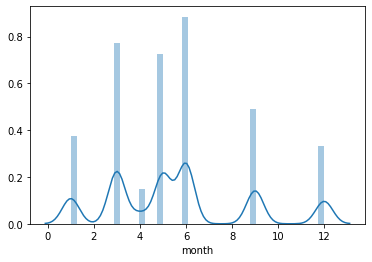

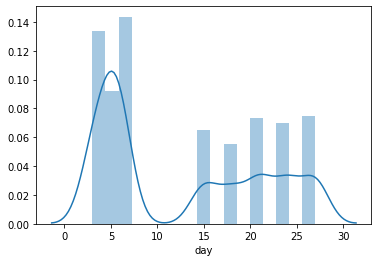

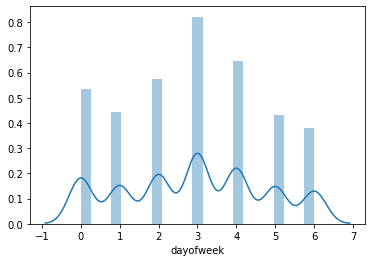

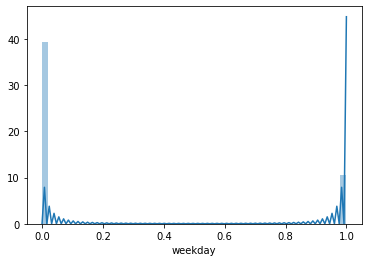

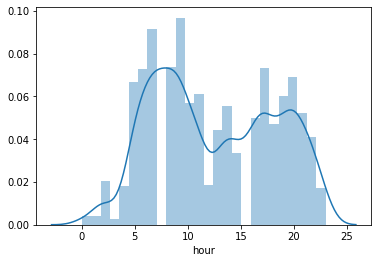

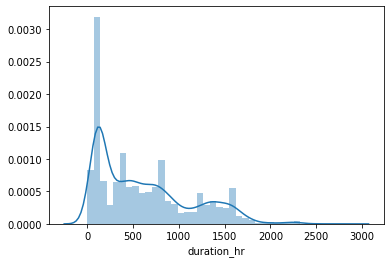

In [244]:
cols=train.columns.values
# Distplot
for i in cols:
    plt.subplots()
    sns.distplot(train[i])

In [245]:
train.skew()

Airline            0.731057
Source            -0.424023
Destination        1.244046
Total_Stops        0.317109
Additional_Info   -1.779689
Price              1.812405
year               0.000000
month              0.629556
day                0.367212
dayofweek         -0.000147
weekday            1.409174
hour               0.112924
duration_hr        0.851197
dtype: float64

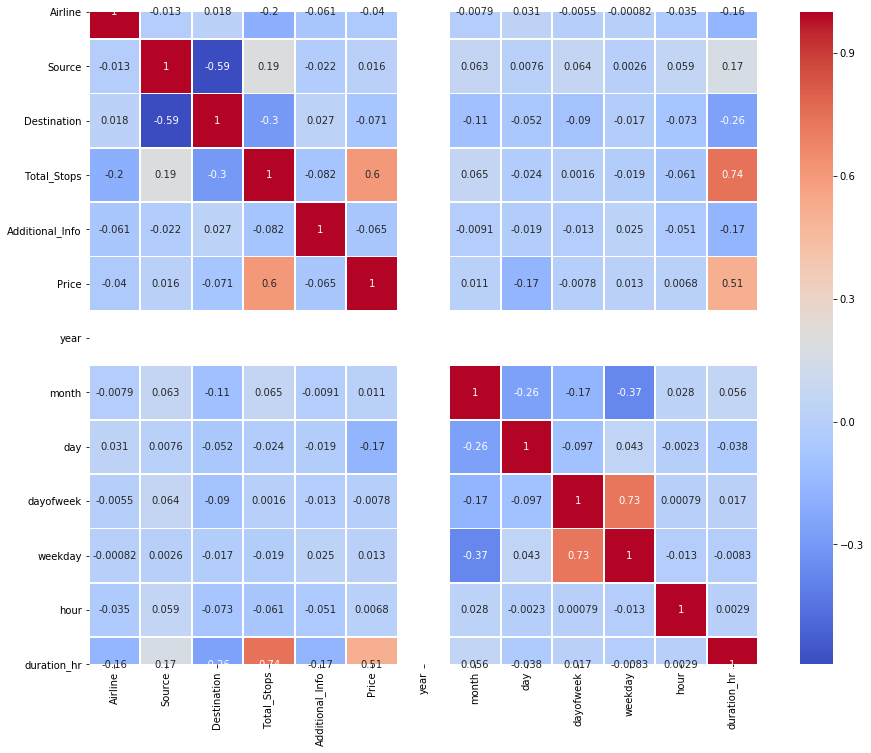

In [246]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

# Train B

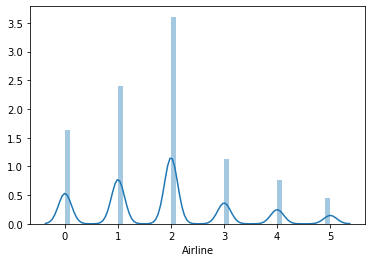

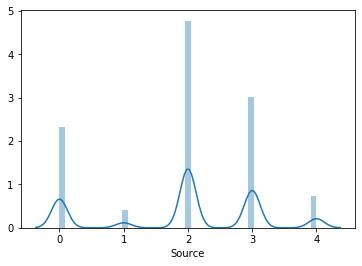

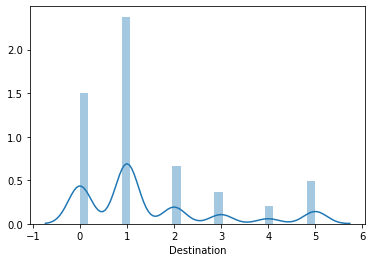

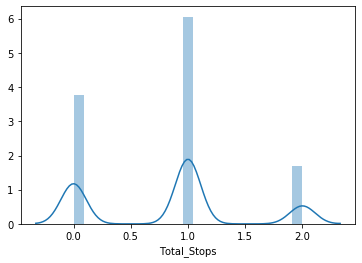

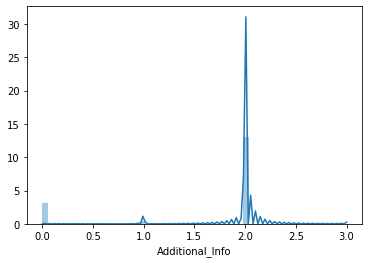

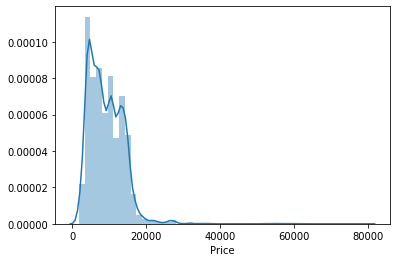

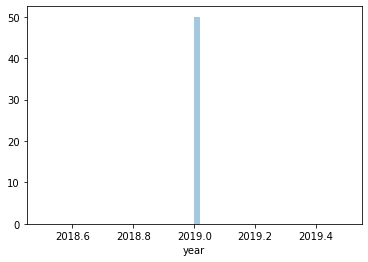

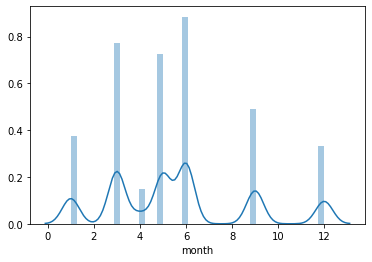

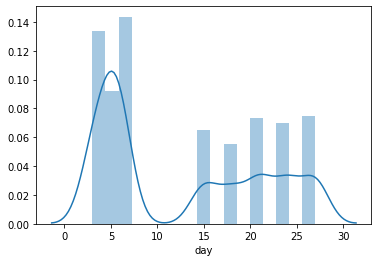

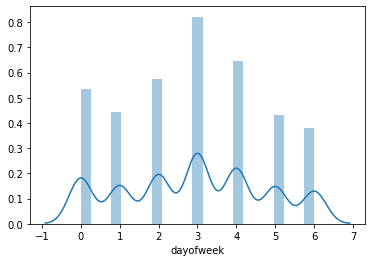

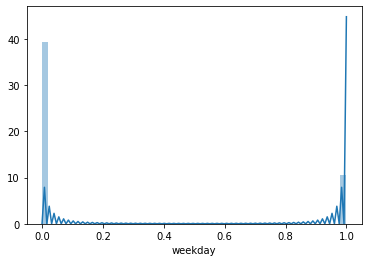

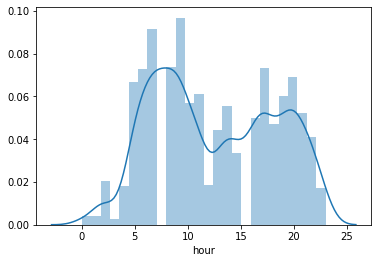

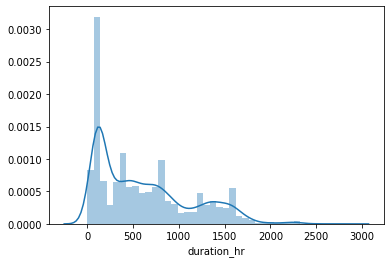

In [247]:
for i in cols:
    plt.subplots()
    sns.distplot(trainb[i])

In [248]:
trainb.skew()

Airline            0.563851
Source            -0.424023
Destination        1.244046
Total_Stops        0.218703
Additional_Info   -1.469313
Price              1.812405
year               0.000000
month              0.629556
day                0.367212
dayofweek         -0.000147
weekday            1.409174
hour               0.112924
duration_hr        0.851197
dtype: float64

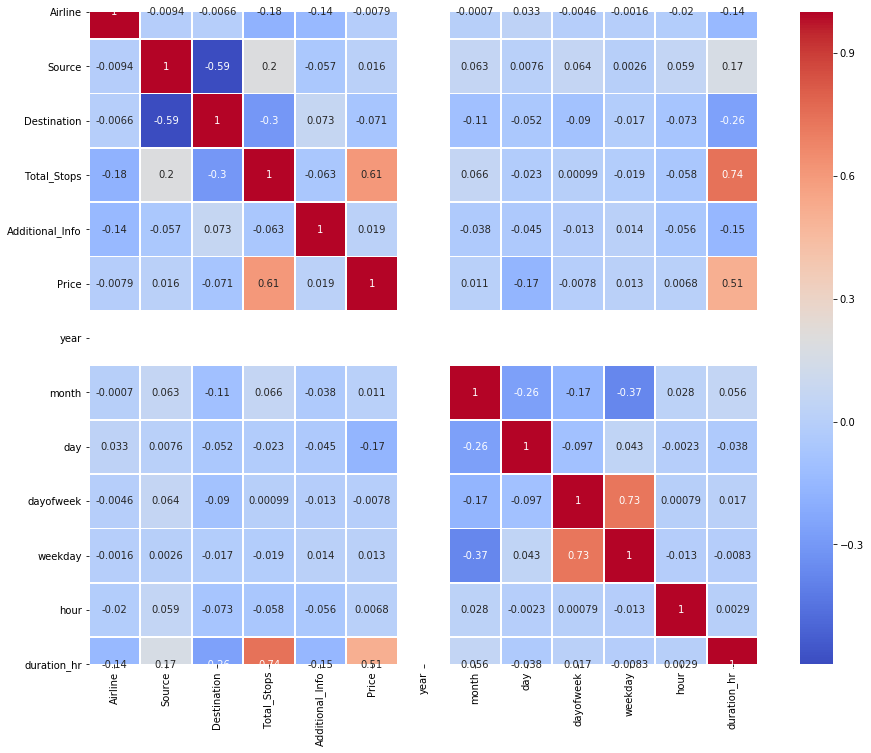

In [249]:
plt.figure(figsize=(15,12))
sns.heatmap(trainb.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

# Train B2

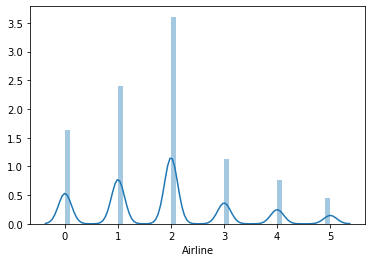

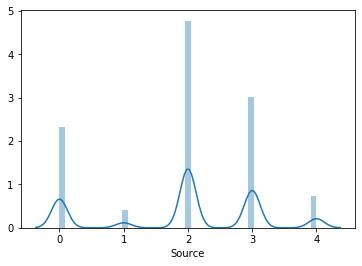

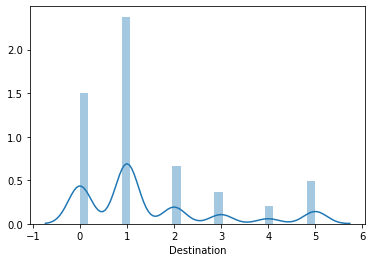

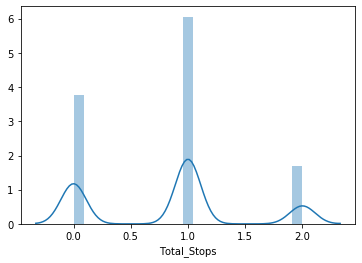

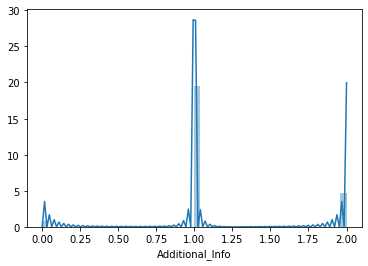

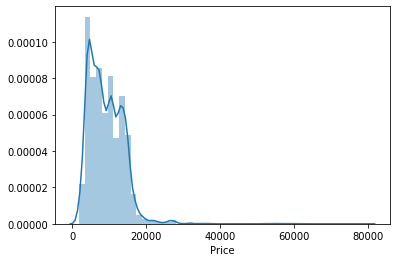

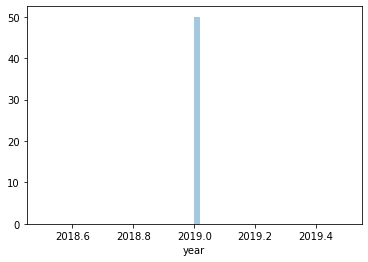

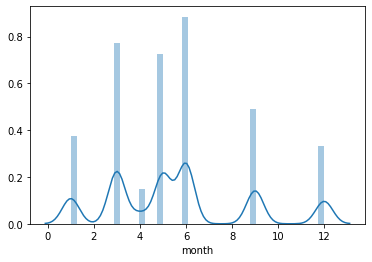

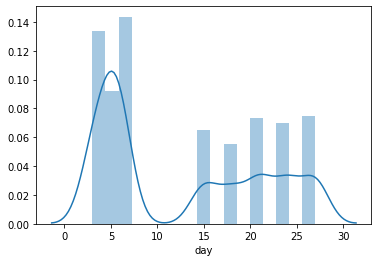

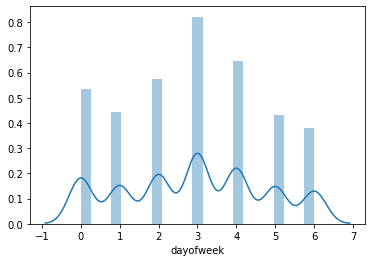

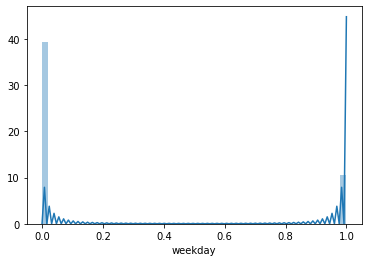

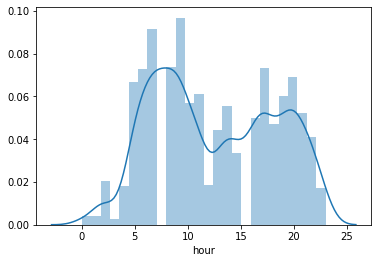

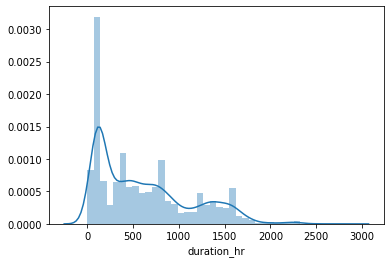

In [250]:
for i in cols:
    plt.subplots()
    sns.distplot(trainb2[i])

In [251]:
trainb2.skew()

Airline            0.563851
Source            -0.424023
Destination        1.244046
Total_Stops        0.218703
Additional_Info    0.736182
Price              1.812405
year               0.000000
month              0.629556
day                0.367212
dayofweek         -0.000147
weekday            1.409174
hour               0.112924
duration_hr        0.851197
dtype: float64

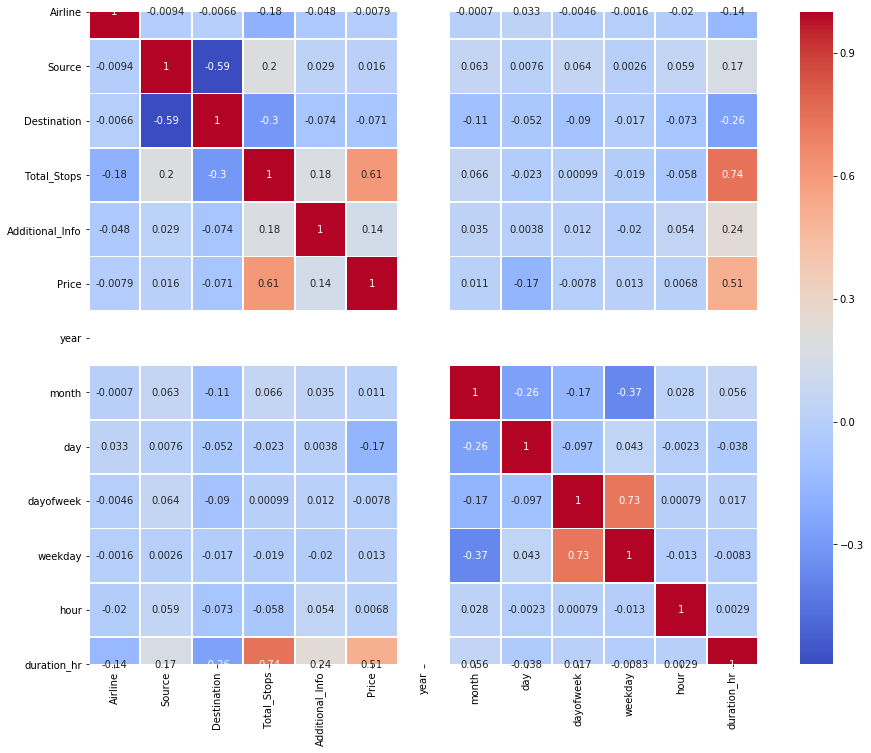

In [252]:
plt.figure(figsize=(15,12))
sns.heatmap(trainb2.corr(),annot=True,cmap='coolwarm',linewidths=0.8)

# Outliers

# Train

In [73]:
train.dtypes

Airline            int32
Source             int32
Destination        int32
Total_Stops        int64
Additional_Info    int32
Price              int64
year               int64
month              int64
day                int64
dayofweek          int64
weekday            int64
hour               int64
duration_hr        int64
dtype: object

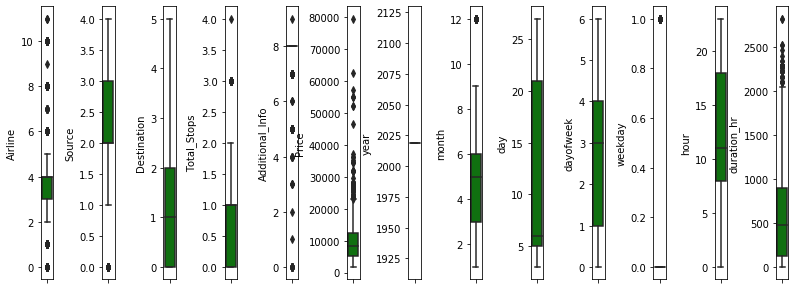

In [254]:
plt.figure(figsize=(12,48))
for i in range(len(cols)):
    plt.subplot(12,14,i+1)
    sns.boxplot(train[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(train))
len(np.where(z>3)[0])

233

In [75]:
trainz=train.copy()
# trainz=trainz[(z<3).all(axis=1)]
# trainz.shape

In [333]:
# using IQR method
# using IQR method
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out=(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return(df_out.sum())

def lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def treat_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>upper(df,col):
            df[col].iloc[i]=upper(df,col)
        elif (df[col].iloc[i])<lower(df,col):
            df[col].iloc[i]=lower(df,col)
            
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return (df.shape)

In [334]:
outlier(trainz)

Airline            4580
Source             2197
Destination           0
Total_Stops          46
Additional_Info    2338
Price                94
year                  0
month               957
day                   0
dayofweek             0
weekday            2265
hour                  0
duration_hr          73
dtype: int64

# Train B

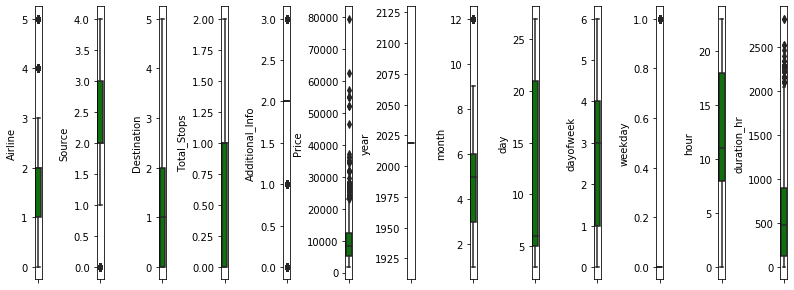

In [335]:
plt.figure(figsize=(12,48))
for i in range(len(cols)):
    plt.subplot(12,14,i+1)
    sns.boxplot(trainb[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [336]:

z=np.abs(zscore(trainb))
len(np.where(z>3)[0])

162

In [338]:
trainbz=trainb.copy()
# trainbz=trainbz[(z<3).all(axis=1)]
# trainbz.shape

# Train B2

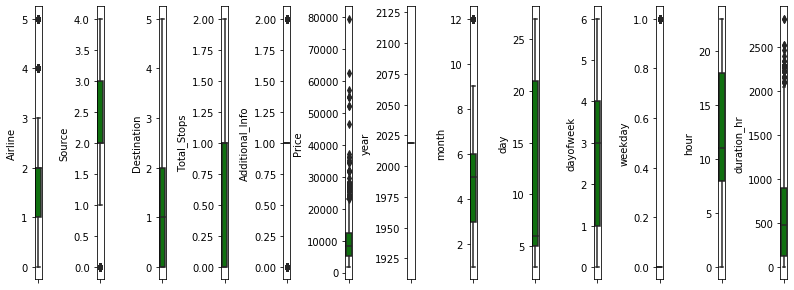

In [339]:
plt.figure(figsize=(12,48))
for i in range(len(cols)):
    plt.subplot(12,14,i+1)
    sns.boxplot(trainb2[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [340]:

z=np.abs(zscore(trainb2))
len(np.where(z>3)[0])

162

In [341]:
# as all the outliers are in categorical variables, we'll let them be.

# Definitions

In [342]:
# this is a regression problem

In [343]:
# lets seperate x and y

In [76]:
x=train.drop('Price',axis=1)
y=train['Price']
xtest=test.copy()

In [77]:
x1=trainb.drop('Price',axis=1)
y1=trainb['Price']
xtest1=testb.copy()

In [78]:
x2=trainb2.drop('Price',axis=1)
y2=trainb2['Price']
xtest2=testb2.copy()

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [80]:
lr=LinearRegression(n_jobs=-1)
rid=Ridge(random_state=45)
ls=Lasso(random_state=45)
dt=DecisionTreeRegressor(random_state=45)
svr=SVR()
knn=KNeighborsRegressor(n_jobs=-1)
rf=RandomForestRegressor(n_jobs=-1,random_state=45)
gb=GradientBoostingRegressor(random_state=45)
xgb=XGBRegressor(n_jobs=-1,random_state=45)
ada=AdaBoostRegressor(random_state=45)

In [81]:
# Now, let's define some functions to reuse them
def fit(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

def get_pred(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return mse,rmse,mae

from sklearn.model_selection import GridSearchCV
def gridcv(m,p,x,y):
    gkb=GridSearchCV(m,p,n_jobs=-1,cv=4,verbose=5,scoring='neg_mean_squared_error')
    gkb.fit(x,y)
    return gkb.best_params_


from sklearn.model_selection import RandomizedSearchCV
def randomcv(m,p,x,y):
    from sklearn.model_selection import RandomizedSearchCV
    gkb=RandomizedSearchCV(estimator=m,param_distributions=p,
                          cv=4,n_iter=100,scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=5,return_train_score=True,random_state=45)
    gkb.fit(x,y)
    return gkb.best_params_

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
def bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, verbose=3, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    return xbfe

def ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    return xffs

from sklearn.decomposition import PCA
def nforpca(x):
    pca=PCA().fit(x)
    plt.figure()
    plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
    plt.xlabel('No of Components')
    plt.ylabel('Variance')
    plt.axhline(y=95, color='r', linestyle='--')
    plt.show()
    
def pca(m,x,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    return xpca


def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1,scoring='r2')
    return (score.mean(), score.std())

from sklearn.preprocessing import StandardScaler
def std(x):
    scx=StandardScaler()
    xs=pd.DataFrame(scx.fit_transform(x), columns=x.columns)
    return xs

from sklearn.preprocessing import MinMaxScaler
def mmc(x):
    mm=MinMaxScaler()
    xm=pd.DataFrame(mm.fit_transform(x), columns=x.columns)
    return xm

def modified_bfe(m,x,y,k):
    sf=sfs(m, k_features=k, forward=False, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xbfe=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xbfe,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_ffs(m,x,y,k):
    sf=sfs(m, k_features=k, forward=True, cv=5, n_jobs=-1)
    sf.fit(x,y)
    feat_names=list(sf.k_feature_names_)
    xffs=x[feat_names]
    x_train, x_test, y_train, y_test=train_test_split(xffs,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def modified_pca(m,x,y,n):
    pca=PCA(n_components=n)
    xpca=pd.DataFrame(pca.fit_transform(x))
    x_train, x_test, y_train, y_test=train_test_split(xpca,y,test_size=0.25,random_state=45)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    return test_score

def tts(x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    return x_train, x_test, y_train, y_test

# Iteration A

In [353]:
print("LR ", get_score(lr,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RF ", get_score(rf,x,y))
print("GB ", get_score(gb,x,y))
print("XGB ", get_score(xgb,x,y))

LR  (0.4333700871205525, -0.36568621162837167, 3548.6737820915873)
RID  (0.433370024272763, -0.366250514488057, 3548.6574861195068)
LS  (0.4333688118415372, -0.3673378433353949, 3548.6311974536666)
DT  (0.9873737863350213, 0.6850709623098398, 2454.2596153075424)
SVR  (-0.022346298896973593, -344491.0314014452, 4666.618110931886)
KNN  (0.7178598575431088, 0.21964166187690903, 3128.332768632381)
RF  (0.9663386828469677, 0.7399513417365478, 2142.1916093348573)
GB  (0.8458590237203538, 0.6382904827014362, 2296.6153819832057)
XGB  (0.9521648153582958, 0.7716667816085336, 1974.798892860036)


In [82]:
xs=std(x)

In [355]:
print("LR ", get_score(lr,xs,y))
print("RID ", get_score(rid,xs,y))
print("LS ", get_score(ls,xs,y))
print("DT ", get_score(dt,xs,y))
print("SVR ", get_score(svr,xs,y))
print("KNN ", get_score(knn,xs,y))
print("RF ", get_score(rf,xs,y))
print("GB ", get_score(gb,xs,y))
print("XGB ", get_score(xgb,xs,y))

LR  (0.4333700871205525, -0.36568621162837656, 3548.673782091588)
RID  (0.43337007616242157, -0.3659919999340788, 3548.663630039898)
LS  (0.43336929631043175, -0.367434894666383, 3548.624463790632)
DT  (0.9873737863350213, 0.6849111041252796, 2453.458217873509)
SVR  (0.038720258216292214, -267.55937411628514, 4529.489128601657)
KNN  (0.8354458006765408, 0.5879465519075129, 2563.6623364271813)
RF  (0.9664389390592952, 0.7408403332767945, 2136.8312293161207)
GB  (0.8458590237203538, 0.6382904827014362, 2296.6153819832057)
XGB  (0.9521648153582958, 0.7719821005168859, 1973.742732449124)


# Iteration B

In [356]:
print("LR ", get_score(lr,x1,y))
print("RID ", get_score(rid,x1,y))
print("LS ", get_score(ls,x1,y))
print("DT ", get_score(dt,x1,y))
print("SVR ", get_score(svr,x1,y))
print("KNN ", get_score(knn,x1,y))
print("RF ", get_score(rf,x1,y))
print("GB ", get_score(gb,x1,y))
print("XGB ", get_score(xgb,x1,y))

LR  (0.4493152622658535, -0.2780287774782879, 3499.108441211945)
RID  (0.44931519315079543, -0.2785912875664982, 3499.0846204754207)
LS  (0.4493139343587263, -0.27979592324731195, 3499.099069538019)
DT  (0.9827583420052253, 0.700442848911269, 2417.5929513247606)
SVR  (-0.021788500474678285, -178619.05119949684, 4665.275114614918)
KNN  (0.6964527603479361, 0.20082954569790024, 3173.0891888582755)
RF  (0.9589650828418662, 0.7434711094460287, 2129.753239273742)
GB  (0.8336291286165534, 0.6635407496173173, 2259.364609570462)
XGB  (0.9499343381891269, 0.7800467831761142, 1946.5331016462162)


In [83]:
x1s=std(x1)

In [358]:
print("LR ", get_score(lr,x1s,y))
print("RID ", get_score(rid,x1s,y))
print("LS ", get_score(ls,x1s,y))
print("DT ", get_score(dt,x1s,y))
print("SVR ", get_score(svr,x1s,y))
print("KNN ", get_score(knn,x1s,y))
print("RF ", get_score(rf,x1s,y))
print("GB ", get_score(gb,x1s,y))
print("XGB ", get_score(xgb,x1s,y))

LR  (0.4493152622658535, -0.2780287774782617, 3499.1084412119444)
RID  (0.449315250771166, -0.2783254685539971, 3499.095949500342)
LS  (0.4493144407682156, -0.27980067136484466, 3499.101236087794)
DT  (0.9827583420052253, 0.7004508128935287, 2416.8604230029387)
SVR  (0.03845954090204107, -272.6936373094473, 4529.699412777437)
KNN  (0.8542794879569315, 0.6372618373209449, 2439.5246311919946)
RF  (0.9592127221566263, 0.7433824458035978, 2128.9155135910714)
GB  (0.8336291286165534, 0.6635407496173173, 2259.364609570462)
XGB  (0.9499343381891269, 0.7802776285356716, 1945.9705292391955)


# Iteration C

In [359]:
print("LR ", get_score(lr,x2,y))
print("RID ", get_score(rid,x2,y))
print("LS ", get_score(ls,x2,y))
print("DT ", get_score(dt,x2,y))
print("SVR ", get_score(svr,x2,y))
print("KNN ", get_score(knn,x2,y))
print("RF ", get_score(rf,x2,y))
print("GB ", get_score(gb,x2,y))
print("XGB ", get_score(xgb,x2,y))

LR  (0.4437385465960837, -0.30740809156565163, 3514.9378451106368)
RID  (0.4437384755401805, -0.307994941617328, 3514.9200419158756)
LS  (0.4437369971735802, -0.3091553972757708, 3514.9162144458596)
DT  (0.9827583420052253, 0.6919119486360029, 2424.9366362866685)
SVR  (-0.021711715959653155, -167383.90241555954, 4665.110246204927)
KNN  (0.6938753175773772, 0.1793158253869609, 3199.9250207052555)
RF  (0.9588263989869308, 0.7433314729670937, 2124.2261631912215)
GB  (0.8112908713720586, 0.6729605380124537, 2249.3217491867663)
XGB  (0.9513526232706583, 0.7720188724410803, 1992.944987282837)


In [84]:
x2s=std(x2)

In [361]:
print("LR ", get_score(lr,x2s,y))
print("RID ", get_score(rid,x2s,y))
print("LS ", get_score(ls,x2s,y))
print("DT ", get_score(dt,x2s,y))
print("SVR ", get_score(svr,x2s,y))
print("KNN ", get_score(knn,x2s,y))
print("RF ", get_score(rf,x2s,y))
print("GB ", get_score(gb,x2s,y))
print("XGB ", get_score(xgb,x2s,y))

LR  (0.4437385465960837, -0.30740809156566207, 3514.9378451106363)
RID  (0.44373853454274037, -0.3077110411519326, 3514.927278020019)
LS  (0.44373775521055225, -0.30914541113730154, 3514.9281763547615)
DT  (0.9827583420052253, 0.6924190963618813, 2422.273487816131)
SVR  (0.03944884715161512, -262.99417681882545, 4528.001110008089)
KNN  (0.8533230100338176, 0.6355963107429389, 2445.300839012641)
RF  (0.9590205594366435, 0.7440474069911835, 2121.190275748678)
GB  (0.8112908713720586, 0.6729605380124537, 2249.3217491867663)
XGB  (0.9513526232706583, 0.772227150211056, 1992.2399349878356)


In [362]:
# DT and XGB are performing best with x1s

In [365]:
# dt with x1s 0.9827583420052253, 0.7004508128935287, 2416.8604230029387
# xgb with x1s 0.9499343381891269, 0.7802776285356716, 1945.9705292391955

# DecisionTree

In [366]:
# dt=DecisionTreeRegressor(random_state=45)

In [367]:
# dt with x1s 0.9827583420052253, 0.7004508128935287, 2416.8604230029387

In [368]:
# Individual Model Pipeline:

# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [371]:
# lets apply BFE
# there are 12 features

In [372]:
modified_bfe(dt,x1s,y,10)

0.7208149294557525

In [373]:
for i in range(7,12):
    print(i," ",modified_bfe(dt,x1s,y,i))

7   0.7168771552891726
8   0.7177109658567864
9   0.716890982062537
10   0.7208149294557525
11   0.7119684383768305


In [374]:
# the best score is at k=10

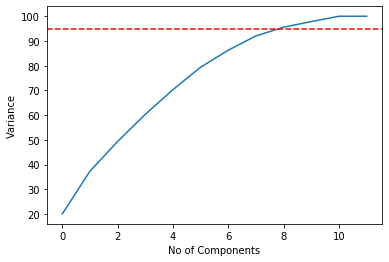

In [375]:
# lets apply pca
nforpca(x1s)

In [376]:
for i in range(6,12):
    print(i," ",modified_pca(dt,x1s,y,i))

6   0.5422866736501943
7   0.5141215025337471
8   0.5520917670806658
9   0.556862797435834
10   0.5888817040606932
11   0.4903856149258473


In [377]:
# we'll use bfe
x1sb=bfe(dt,x1s,y,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.8s finished

[2020-03-27 21:16:30] Features: 11/10 -- score: 0.7958702992655171[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.7s finished

[2020-03-27 21:16:31] Features: 10/10 -- score: 0.8028822262021515

In [378]:
get_score(dt,x1sb,y)

(0.8643855094526176, 0.7208149294557525, 2241.1679557728853)

In [379]:
# lets tune dt,x1sb,y

In [382]:
DecisionTreeRegressor?

In [381]:
param_dt={'criterion':['friedman_mse','mse','mae'],'splitter':['random','best'],'max_features':['auto','sqrt','log2'],
          'presort':[True,False]}
gridcv(dt,param_dt,x1sb,y)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   21.0s finished


{'criterion': 'friedman_mse',
 'max_features': 'auto',
 'presort': True,
 'splitter': 'random'}

In [383]:
dt1=DecisionTreeRegressor(random_state=45,criterion= 'friedman_mse',
 max_features= 'auto',
 presort= True,
 splitter= 'random')

In [384]:
param_dt1={'max_depth':[2,4,8,12],'min_samples_split':[2,4,8,12],'min_samples_leaf':[1,4,8,12],
          'min_weight_fraction_leaf':[0.0,0.1,0.2,0.3],'max_leaf_nodes':[5,10,15,20]}
gridcv(dt1,param_dt1,x1sb,y)

Fitting 4 folds for each of 1024 candidates, totalling 4096 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1468 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 2728 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 4096 out of 4096 | elapsed:   18.6s finished


{'max_depth': 8,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

In [385]:
param_dt2={'max_depth':[5,6,7,8,9,10],'min_samples_split':[2,3,4,5,6,7],'min_samples_leaf':[5,6,7,8,9,10],
          'min_weight_fraction_leaf':[0.0,0.4],'max_leaf_nodes':[15,20,25,30,40,50]}
gridcv(dt1,param_dt2,x1sb,y)

Fitting 4 folds for each of 2592 candidates, totalling 10368 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 2184 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 3480 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 5064 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 6936 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 9096 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 10368 out of 10368 | elapsed:   52.1s finished


{'max_depth': 10,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

In [393]:
param_dt2={'max_depth':[15,16,17,18],'min_samples_split':[2,3,4],'min_samples_leaf':[4,5,6],
          'max_leaf_nodes':[255,260,262,265,267]}
gridcv(dt1,param_dt2,x1sb,y)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    5.0s finished


{'max_depth': 16,
 'max_leaf_nodes': 267,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [394]:
dt1=DecisionTreeRegressor(random_state=45,criterion= 'friedman_mse',
 max_features= 'auto',
 presort= True,
 splitter= 'random',max_depth= 16,
 max_leaf_nodes= 267,
 min_samples_leaf= 5,
 min_samples_split= 2)
get_score(dt1,x1sb,y)

(0.830727981457076, 0.6985145368738955, 2260.323327996742)

In [395]:
# score decreased

In [396]:
param_dt3={'max_depth':[14,15,16,17,18,19],'min_samples_split':[2,3,4,5],'min_samples_leaf':[3,4,5,6],
          'max_leaf_nodes':[245,255,260,262,265,267,270,280]}
gridcv(dt,param_dt3,x1sb,y)

Fitting 4 folds for each of 768 candidates, totalling 3072 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 2184 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 3072 out of 3072 | elapsed:   21.7s finished


{'max_depth': 15,
 'max_leaf_nodes': 267,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [402]:
dt2=DecisionTreeRegressor(random_state=45,max_depth= 16,
 max_leaf_nodes= 266,
 min_samples_leaf= 5,
 min_samples_split= 2)
get_score(dt2,x1sb,y)

(0.8417019816896381, 0.7188282216973627, 2208.438836913253)

In [403]:
# score reduced

In [408]:
# lets boost dt,x1sb,y
adadt=AdaBoostRegressor(base_estimator=dt, random_state=45, n_estimators=110, learning_rate=0.0001)
get_score(adadt,x1sb,y)

(0.8641514882510242, 0.724974061603457, 2221.9054928537303)

In [409]:
# the score improved

In [411]:
# lets cross validate adadt,x1sb,y
for i in range(3,5):
    print(i, " ", cross(adadt,x1sb,y,i))

3   (0.8035288175535843, 0.011677615938583718)
4   (0.8051157830330301, 0.015843496629043878)


In [412]:
for i in range(5,10):
    print(i, " ", cross(adadt,x1sb,y,i))

5   (0.8035971966702302, 0.011069928104530537)
6   (0.808712264426687, 0.018802281629546665)
7   (0.8063340235066935, 0.02559568144101637)
8   (0.806716151201835, 0.029020061981729635)
9   (0.8072512541747895, 0.0258415190347499)


In [413]:
# best score at cv=6

In [414]:
crosspred=cross_val_predict(adadt,x1sb,y,cv=6)

In [415]:
# Evaluation metrics
mse=mean_squared_error(y,crosspred)
mae=mean_absolute_error(y,crosspred)
rmse=np.sqrt(mean_squared_error(y,crosspred))
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  4100715.2422766536
Root_Mean_Squared_Error:  2025.0222819210296
Mean_Absolute_Error:  1052.264570673996


In [416]:
# cross validated model is performing better

# XGB

In [417]:
# xgb with x1s 0.9499343381891269, 0.7802776285356716, 1945.9705292391955

In [418]:
# xgb=XGBRegressor(n_jobs=-1,random_state=45)

In [419]:
# Individual Model Pipeline:

# 1. feature selection
# 2. Hyper parameter tuning
# 3. Boosting
# 4. Cross Validation
# 5. Evaluation Metrics

In [420]:
modified_bfe(xgb,x1s,y,10)

0.7776207867200435

In [421]:
modified_bfe(xgb,x1s,y,11)

0.7776207867200435

In [422]:
modified_bfe(xgb,x1s,y,9)

0.7765619055128042

In [423]:
modified_bfe(xgb,x1s,y,8)

0.7778371733041767

In [424]:
# we won't apply bfe

In [425]:
# lets use pca
for i in range(6,12):
    print(i," ",modified_pca(xgb,x1s,y,i))

6   0.5903310031393888
7   0.6399713568820077
8   0.6560758832840796
9   0.6686830056186566
10   0.6616672466993483
11   0.6462826988581649


In [426]:
# lets tune xgb,x1s,y

In [427]:
XGBRegressor?

In [428]:
param_xgb={'booster':['gbtree', 'gblinear', 'dart'],'importance_type':["gain", "weight", "cover", "total_gain","total_cover"]}
gridcv(xgb,param_xgb,x1s,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   51.9s finished


{'booster': 'dart', 'importance_type': 'gain'}

In [85]:
xgb1=XGBRegressor(n_jobs=-1,random_state=45,booster= 'dart',importance_type= 'gain')

In [430]:
param_xgb1={'max_depth':[2,4,8,12],'learning_rate':[0.001,0.01,0.1,1,2],'gamma':[0.1,1,2,4,8],'min_child_weight':[1,2,4,8],
           'reg_alpha':[0.1,0.5,1,2,4],'reg_lambda':[0.1,0.5,1,2,4]}
randomcv(xgb1,param_xgb1,x1s,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 10.3min finished


{'reg_lambda': 1,
 'reg_alpha': 0.5,
 'min_child_weight': 4,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 8}

In [431]:
param_xgb2={'max_depth':[5,6,7,8,9,10,11],'learning_rate':[0.1,0.2,0.4,0.6,0.8],'gamma':[5,7,8,9,11],'min_child_weight':[3,4,5,7],
           'reg_alpha':[0.2,0.3,0.5,0.8],'reg_lambda':[0.8,1,1.2,1.5]}
randomcv(xgb1,param_xgb2,x1s,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 15.0min finished


{'reg_lambda': 1,
 'reg_alpha': 0.5,
 'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 5}

In [432]:
param_xgb3={'max_depth':[10,11,12],'learning_rate':[0.1,0.2,0.3],'gamma':[5,6,7],'min_child_weight':[6,7,8],
           'reg_alpha':[0.5,0.6,0.7],'reg_lambda':[0.8,1]}
randomcv(xgb1,param_xgb3,x1s,y)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 21.7min finished


{'reg_lambda': 1,
 'reg_alpha': 0.7,
 'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 6}

In [86]:
xgb2=XGBRegressor(n_jobs=-1,random_state=45,booster= 'dart',importance_type= 'gain',reg_lambda= 1,
 reg_alpha= 0.7,
 min_child_weight= 7,
 max_depth= 10,
 learning_rate= 0.1,
 gamma= 6)
get_score(xgb2,x1s,y)

(0.9485033916450265, 0.773681774084364, 1978.658367934265)

In [434]:
# the score reduced 

In [435]:
param_xgb4={'n_estimators':range(50,400,100)}
randomcv(xgb2,param_xgb4,x1s,y)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:  4.3min remaining:   59.8s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  4.7min finished


{'n_estimators': 150}

In [436]:
param_xgb5={'n_estimators':range(60,160,10)}
gridcv(xgb2,param_xgb5,x1s,y)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.2min finished


{'n_estimators': 80}

In [87]:
xgb3=XGBRegressor(n_jobs=-1,random_state=45,booster= 'dart',importance_type= 'gain',reg_lambda= 1,
 reg_alpha= 0.7,
 min_child_weight= 7,
 max_depth= 10,
 learning_rate= 0.1,
 gamma= 6,n_estimators= 80)
get_score(xgb3,x1s,y)

(0.9420633804417176, 0.7737869113299605, 1970.7308932900705)

In [88]:
xgb4=XGBRegressor(n_jobs=-1,random_state=45,
 min_child_weight= 7,
 max_depth= 10,
 learning_rate= 0.1,
 gamma= 6,n_estimators= 80)
get_score(xgb4,x1s,y)

(0.9437545056309473, 0.7732762052098056, 1973.384064806151)

In [440]:
# the score reduced

In [441]:
# lets cross validate xgb,x1s,y
for i in range(3,6):
    print(i, " ", cross(xgb,x1s,y,i))

3   (0.8368699682362931, 0.007050977470641374)
4   (0.8470013776892271, 0.006541013361605991)
5   (0.8522527547218495, 0.013452874823879586)


In [442]:
for i in range(6,11):
    print(i, " ", cross(xgb,x1s,y,i))

6   (0.8567679212169241, 0.018256473497478463)
7   (0.8518721361382081, 0.011630595528303195)
8   (0.849385366677067, 0.01958577738763581)
9   (0.8488246037436311, 0.023116569240789923)
10   (0.8539047368518554, 0.02330752627306771)


In [443]:
# the best score at cv=6
crosspred=cross_val_predict(xgb,x1s,y,cv=6)

In [444]:
# Evaluation metrics
mse=mean_squared_error(y,crosspred)
mae=mean_absolute_error(y,crosspred)
rmse=np.sqrt(mean_squared_error(y,crosspred))
print('Mean_Squared_Error: ', mse)
print('Root_Mean_Squared_Error: ', rmse)
print('Mean_Absolute_Error: ', mae)

Mean_Squared_Error:  3039386.514495193
Root_Mean_Squared_Error:  1743.3836395054282
Mean_Absolute_Error:  903.4252716218726


In [445]:
# the best model is cross validated xgb

# Saving the model

In [89]:
cv_results = cross_validate(xgb, x1s ,y, cv=6, return_estimator=True)
xgb_fit = cv_results['estimator']
xgb_fit=xgb_fit[0]

In [90]:
import joblib
joblib.dump(xgb_fit,'xgb_flight.pkl')

['xgb_flight.pkl']

In [91]:
xtest1std=std(xtest1)

In [449]:
pred=xgb_fit.predict(xtest1)

In [450]:
predic=pd.DataFrame(pred)
predic.to_csv('pred_flight_fare.csv')